In [36]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from discountrx_analysis_helper import min_within_group, max_within_group
%load_ext autoreload
%autoreload 2
sns.set(rc={'figure.figsize':(14,10)})

store_types=pd.read_csv('../data/store_type_grx.csv')
site1=pd.read_csv('./GDiscountrxClean.csv')
site2=df=pd.read_csv('./W1Discountrx_Selenium2_Clean.csv')
site3=pd.read_csv('./W2Discountrx_Selenium2_Clean.csv')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# merge website 1 data with prescription and store type data for analysis
site1=pd.merge(site1,store_types)
prescriptions=pd.read_csv('../web scraping/discount_meds/discount_meds/clincalcg.csv')
prescriptions.columns=["Prescription Rank","Drug name","Drug Popularity"]
site1["Drug name"]=site1["Drug name"].str.strip()
prescriptions["Drug name"]=prescriptions["Drug name"].str.strip()
prescriptions["Drug Popularity"]=prescriptions["Drug Popularity"].str.replace(",","").astype(int)
site1=pd.merge(site1,prescriptions)

<AxesSubplot:xlabel='Price', ylabel='Drug Popularity'>

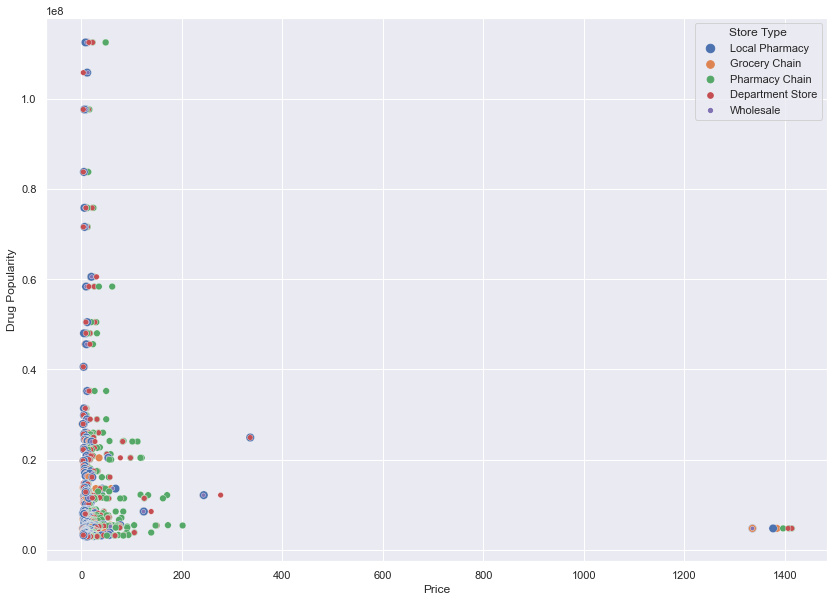

In [133]:
sns.scatterplot(data=site1, x="Price", y="Drug Popularity",hue="Store Type", size="Store Type")

<AxesSubplot:ylabel='Store Type'>

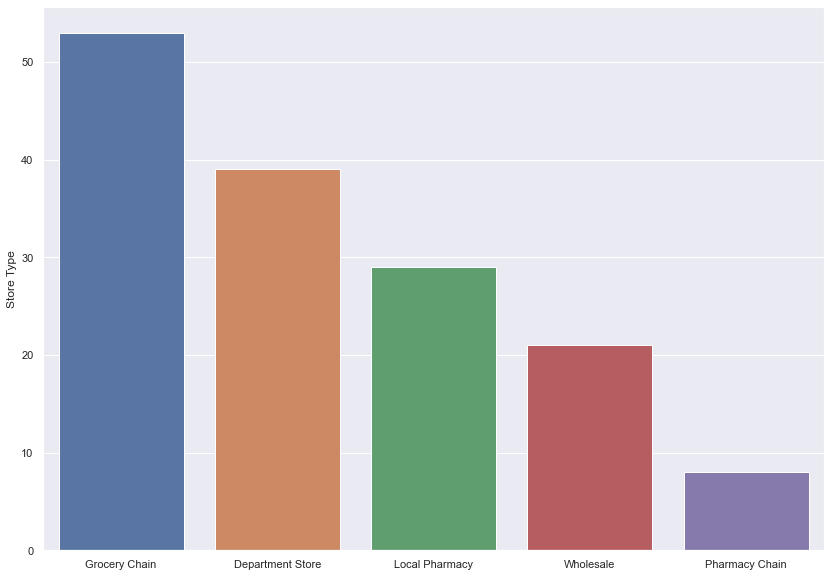

In [93]:
# who store types tend to have the lowest prices in site 1
min_price_site1=min_within_group(site1)
sns.barplot(x=min_price_site1.index, y=min_price_site1)

<AxesSubplot:ylabel='Store Type'>

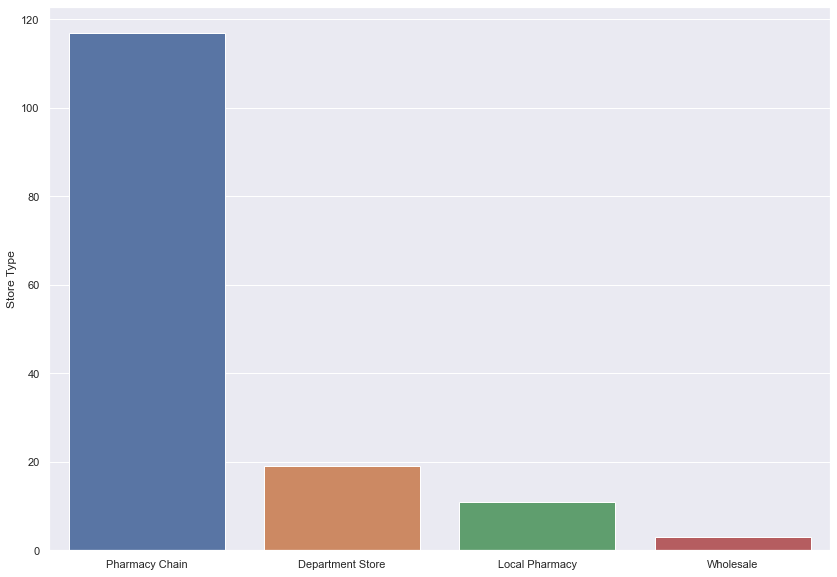

In [94]:
#which store types tend to have the maximum prices
max_price_site1=max_within_group(site1)
sns.barplot(x=max_price_site1.index, y=max_price_site1)

In [38]:
# merge website 2 data with prescription and store type data for analysis
#site2.shape
#store_types['Pharmacy']=store_types['Pharmacy'].str.strip()
site2['Pharmacy']=site2['Pharmacy'].str.strip()
site2=pd.merge(site2,store_types)
prescriptions2=pd.read_csv('../web scraping/discount_meds/discount_meds/clincalcw1.csv')
prescriptions2.columns=["Prescription Rank","Drug name","Drug Popularity"]
site2["Drug name"]=site2["Drug name"].str.strip()
prescriptions2["Drug name"]=prescriptions2["Drug name"].str.strip()
prescriptions2["Drug Popularity"]=prescriptions2["Drug Popularity"].str.replace(",","").astype(int)
site2=pd.merge(site2,prescriptions2)

<AxesSubplot:xlabel='Price', ylabel='Drug Popularity'>

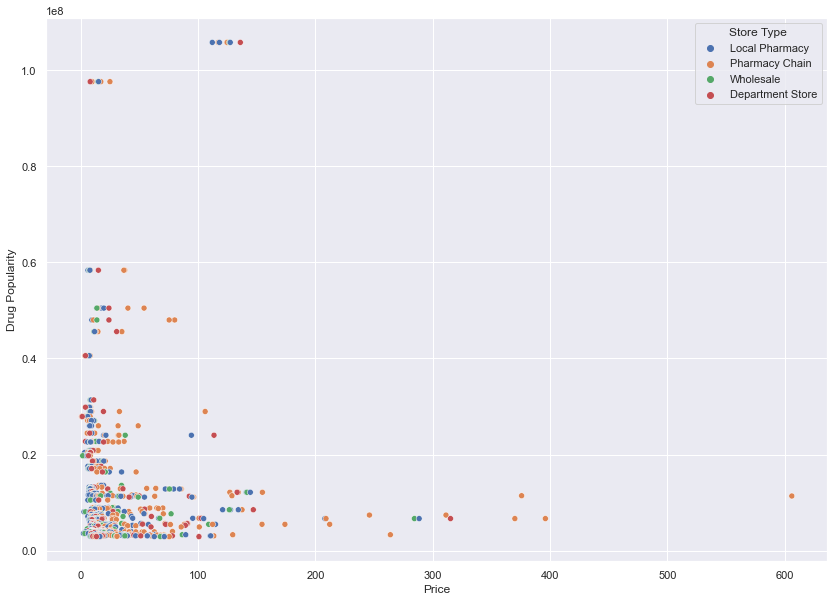

In [100]:
sns.scatterplot(data=site2, x="Price", y="Drug Popularity",hue="Store Type")

<AxesSubplot:ylabel='Store Type'>

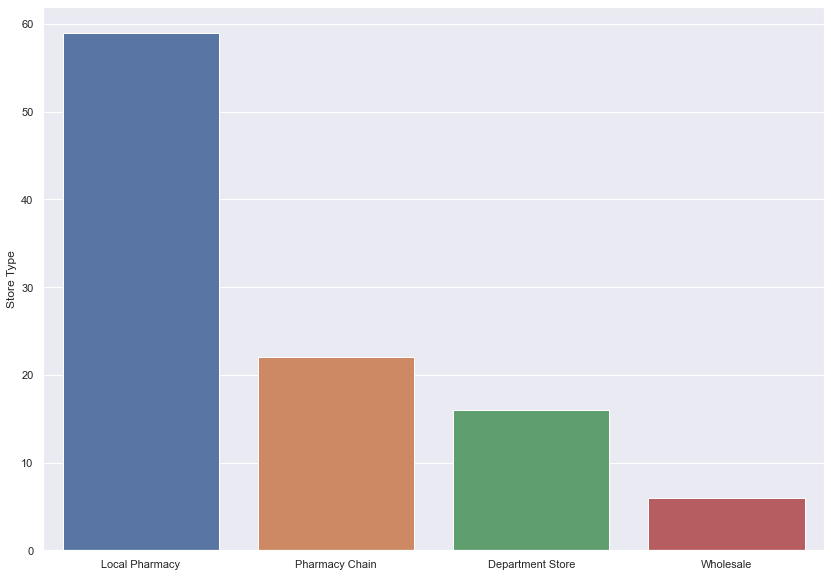

In [96]:
# who store types tend to have the lowest prices in site 2
min_price_site2=min_within_group(site2)
sns.barplot(x=min_price_site2.index, y=min_price_site2)

<AxesSubplot:ylabel='Store Type'>

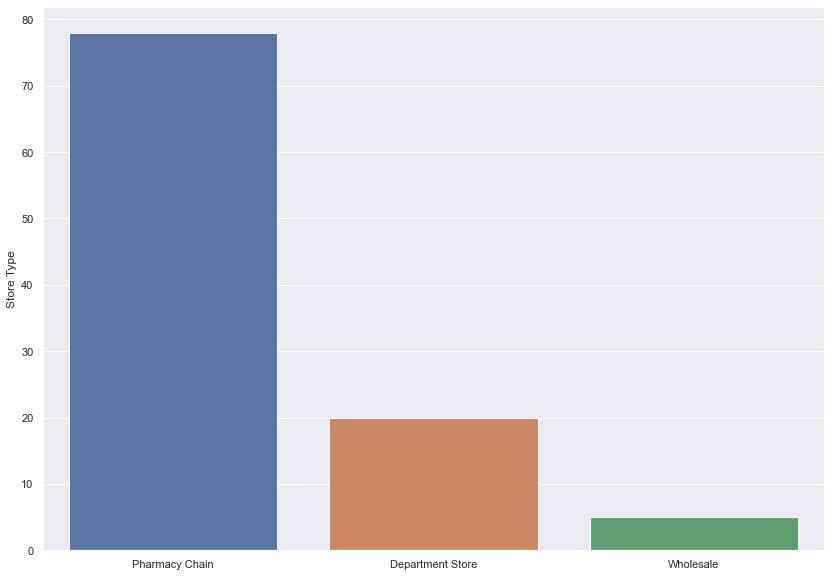

In [97]:
#which store types tend to have the maximum prices
max_price_site2=max_within_group(site2)
sns.barplot(x=max_price_site2.index, y=max_price_site2)

In [39]:
# merge website 2 data with prescription and store type data for analysis
site3['Pharmacy']=site3['Pharmacy'].str.strip()
site3=pd.merge(site3,store_types)
prescriptions3=pd.read_csv('../web scraping/discount_meds/discount_meds/clincalc_with_dash.csv')
prescriptions3.columns=["Prescription Rank","Drug name","Drug Popularity"]
site3["Drug Name"]=site3["Drug Name"].str.strip()
prescriptions3["Drug name"]=prescriptions3["Drug name"].str.replace("-"," ").str.replace("HCL","Hcl").str.replace("ER","Er").str.strip()
prescriptions3["Drug Popularity"]=prescriptions3["Drug Popularity"].str.replace(",","").astype(int)
site3=pd.merge(site3,prescriptions3,left_on="Drug Name", right_on="Drug name")

<AxesSubplot:xlabel='Price', ylabel='Drug Popularity'>

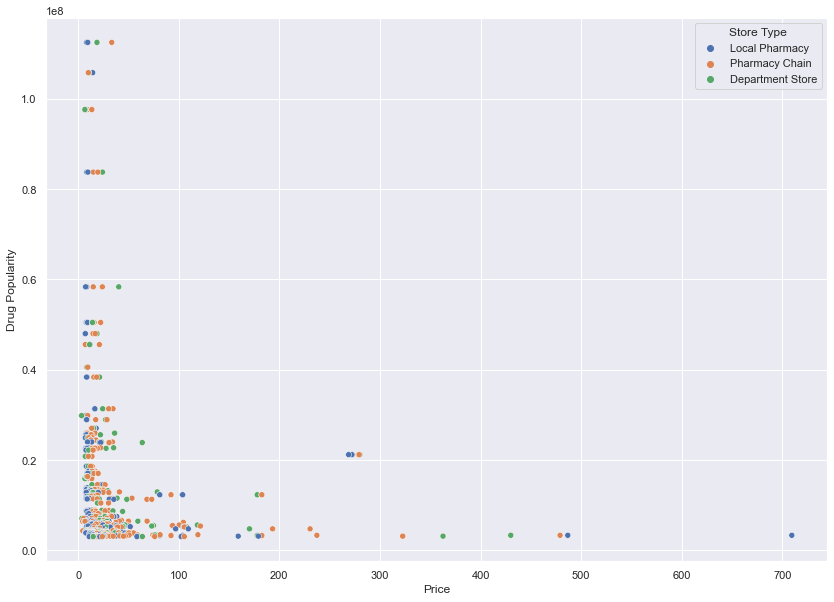

In [101]:
sns.scatterplot(data=site3, x="Price", y="Drug Popularity",hue="Store Type")

<AxesSubplot:ylabel='Store Type'>

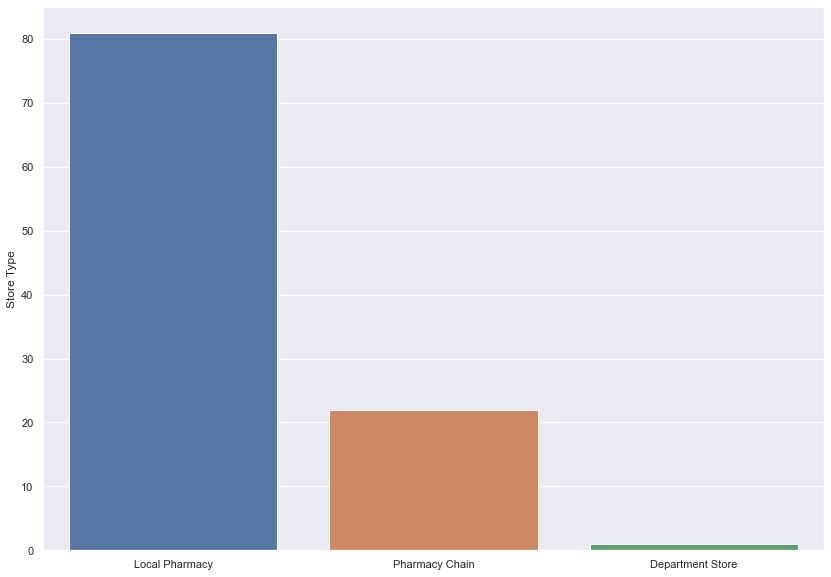

In [103]:
# who store types tend to have the lowest prices in site 3
min_price_site3=min_within_group(site3)
sns.barplot(x=min_price_site3.index, y=min_price_site3)

<AxesSubplot:xlabel='Site', ylabel='Price'>

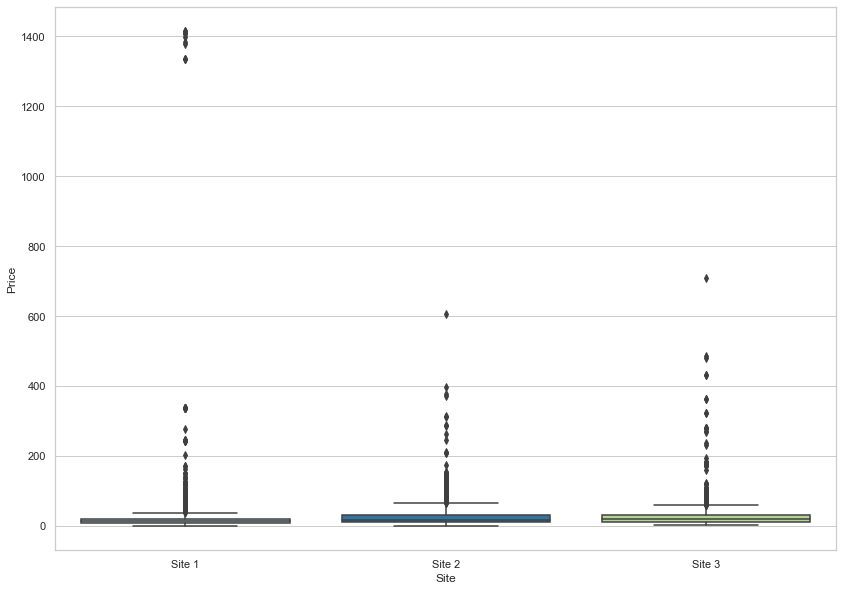

In [47]:
# show overall data behavior
#site1['Site']="Site 1"
#site2['Site']="Site 2"
#site3['Site']="Site 3"
#sites = [site1[site1["Price"]<50], site2[site2["Price"]<50], site3[site3["Price"]<50]]
#sites = [site1, site2, site3]
#allSites = pd.concat(sites)
sns.set_style("whitegrid")
sns.set_palette("Paired")
sns.boxplot(x="Site", y="Price", data=allSites)

<AxesSubplot:ylabel='Store Type'>

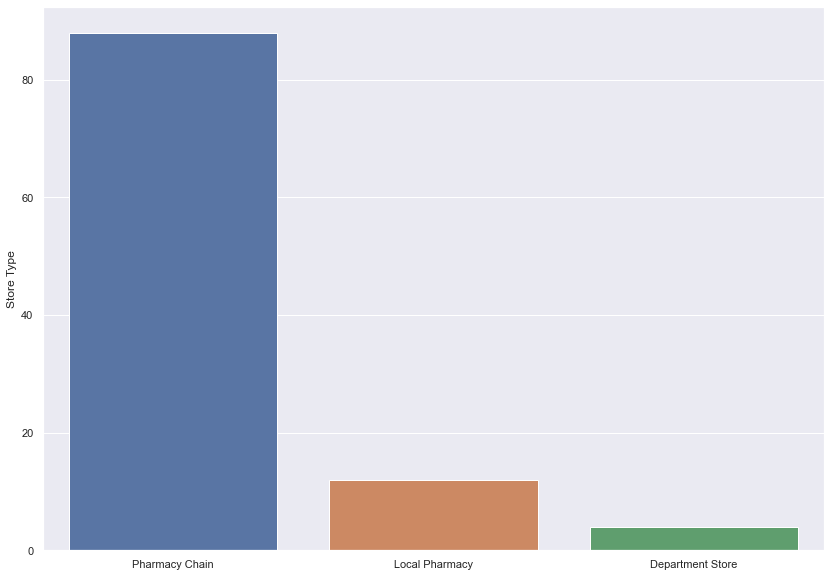

In [104]:
#which store types tend to have the maximum prices
max_price_site3=max_within_group(site3)
sns.barplot(x=max_price_site3.index, y=max_price_site3)

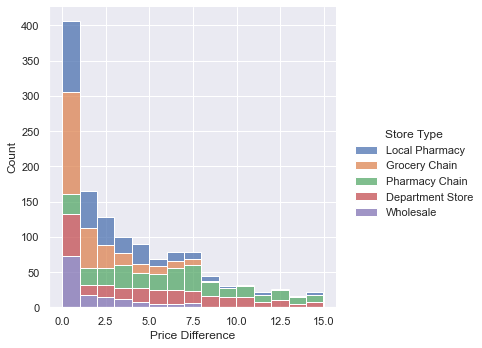

In [54]:
#Distribution or price after subtraction from min
site1_with_min=site1.join(site1.groupby('Drug name')['Price'].agg(['min']), on='Drug name')
site1['Price Difference']=site1['Price']-site1_with_min['min']
shrink_site1=site1[site1['diff']<15]
sns.set_style("whitegrid")
#sns.set_palette("Paired")
sns.set(rc={'figure.figsize':(14,10)})


sns.color_palette("YlGn", 5)
sns.displot(data=shrink_site1, x=shrink_site1['Price Difference'], hue="Store Type", multiple="stack")

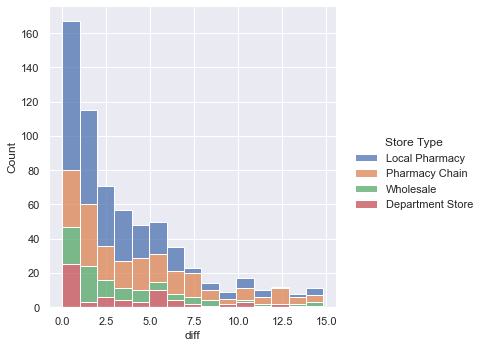

In [110]:
#Distribution or price after subtraction from min site 2
site2_with_min=site2.join(site2.groupby('Drug name')['Price'].agg(['min']), on='Drug name')
site2['diff']=site2['Price']-site2_with_min['min']
shrink_site2=site2[site2['diff']<15]
sns.displot(data=shrink_site2, x=shrink_site2['diff'], hue="Store Type", multiple="stack")

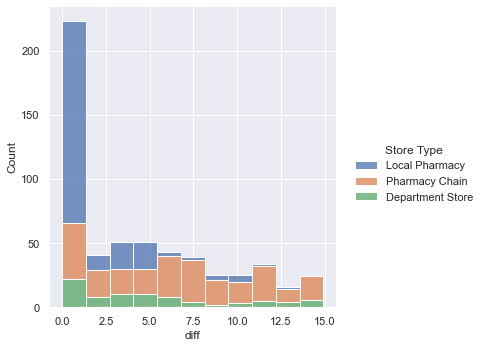

In [112]:
#Distribution or price after subtraction from min site 3
site3_with_min=site3.join(site3.groupby('Drug name')['Price'].agg(['min']), on='Drug name')
site3['diff']=site3['Price']-site3_with_min['min']
shrink_site3=site3[site3['diff']<15]
sns.displot(data=shrink_site3, x=shrink_site3['diff'], hue="Store Type", multiple="stack")

In [35]:
#Distribution subtraction from min
site3_with_min=site3.join(site3.groupby('Drug Name')['Price'].agg(['min']), on='Drug Name')
site3['diff']=site3['Price']-site3_with_min['min']

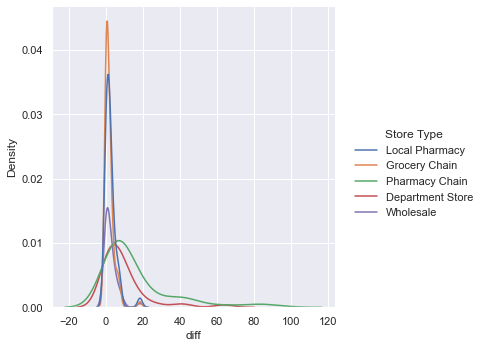

In [127]:
#top ten presciprtions
top_ten=site1[site1['Prescription Rank'].astype(int)<52]
sns.displot(data=top_ten,x='diff', kind="kde", 
             color = 'darkblue', hue="Store Type")

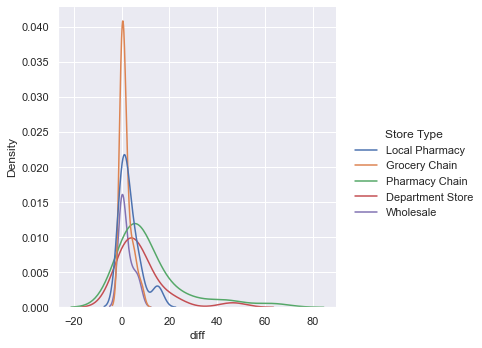

In [126]:
#bottom ten prescriptions
bottom_ten=site1[site1['Prescription Rank'].astype(int)>181]
sns.displot(data=bottom_ten,x='diff', kind="kde", 
             color = 'darkblue', hue="Store Type")

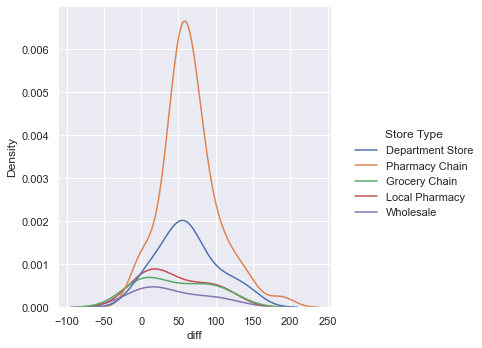

In [128]:
#most expensive presciprtions
most_expensive=site1.sort_values("Price",ascending=False).iloc[:100,:]
sns.displot(data=most_expensive,x='diff', kind="kde", 
             color = 'darkblue', hue="Store Type")

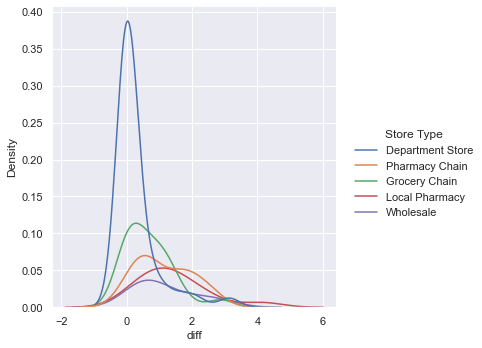

In [129]:
least_expensive=site1.sort_values("Price").iloc[:100,:]
sns.displot(data=least_expensive,x='diff', kind="kde", 
             color = 'darkblue', hue="Store Type")

In [135]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import researchpy as rp
print(rp.summary_cont(site1['Price']))
print(rp.summary_cont(site2['Price']))
print(rp.summary_cont(site3['Price']))



  Variable       N    Mean        SD      SE  95% Conf.  Interval
0    Price  1540.0  31.207  115.2043  2.9357    25.4487   36.9654


  Variable      N     Mean       SD      SE  95% Conf.  Interval
0    Price  817.0  32.1551  48.6402  1.7017    28.8149   35.4953


  Variable      N     Mean       SD      SE  95% Conf.  Interval
0    Price  654.0  36.2176  62.4963  2.4438    31.4189   41.0162
